# End to End Machine Learning Project

    Steps to build any ML model

    1. Understanding the Problem / Look at the big Picture
    2. Get the Data
    3. Exploratory Data Analysis to Gain Insights from data
    4. Prepare Data for Machine Learning Algorithms 
    5. Select a Model and Train it
    6. Fine Tune your model
    7. Present your Solution
    8. Launch, Monitor, and Maintain your system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from urllib import request
import os
import tarfile


In [3]:
# download and extract housing data in datasets folder
def get_housing_data():
    dir_path = Path('datasets/')
    file_path = Path('datasets/housing.tgz')
    url = "https://github.com/sachinyadav3496/handson-ml2/raw/master/datasets/housing/housing.tgz"
    if not dir_path.exists():
        # if folder doesn't exists create one
        os.mkdir(dir_path)
    if not file_path.exists():
        request.urlretrieve(url, file_path)
        with tarfile.open(file_path) as file:
            file.extractall(dir_path)
        print("Dowload and Extraction is complete!")
    else:
        print("Data already exists so skipping download and extraction!")
    
    df = pd.read_csv(Path("datasets/housing.csv"))
    df['ocean_proximity'] = df['ocean_proximity'].astype('category')
    return df
    


In [5]:
housing = get_housing_data()

Data already exists so skipping download and extraction!


# Sampling of Data into training and test set

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
# supervise ML model
X = housing.drop('median_house_value', axis=1) # features / atrributes
y = housing['median_house_value'] # labels / target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [14]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694,INLAND
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392,<1H OCEAN
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292,<1H OCEAN
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226,<1H OCEAN
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375,<1H OCEAN


In [16]:
y_train.head()

9950    287500.0
3547    271500.0
4448    191700.0
6984    219700.0
4432    114000.0
Name: median_house_value, dtype: float64

In [18]:
num_features = list(X_train.columns[:-1])
cat_features = ['ocean_proximity']

print("Numerical features: ", *num_features)
print('Categorical features: ', *cat_features)

Numerical features:  longitude latitude housing_median_age total_rooms total_bedrooms population households median_income
Categorical features:  ocean_proximity


In [20]:
X_train_num = X_train[num_features].copy()
X_train_cat = X_train[cat_features].copy()

X_test_num = X_test[num_features].copy()
X_test_cat = X_test[cat_features].copy()

In [22]:
X_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


In [24]:
X_train_cat.head()

,ocean_proximity
9950,INLAND
3547,<1H OCEAN
4448,<1H OCEAN
6984,<1H OCEAN
4432,<1H OCEAN


In [26]:
#sns.get_dataset_names()
#tips, mpg

In [28]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


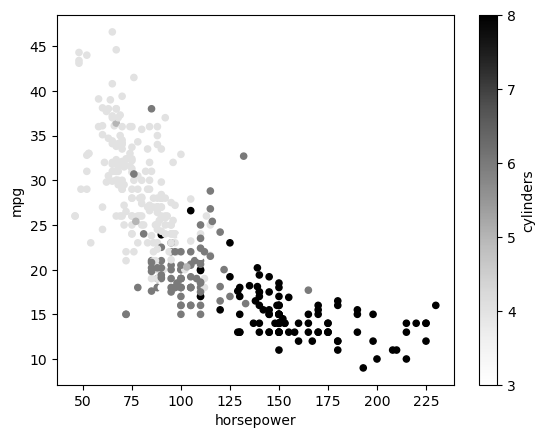

In [30]:
mpg.plot(kind='scatter', x='horsepower', y='mpg', c='cylinders')
plt.show()

In [32]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# history 

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [35]:
corr = X_train_num.corrwith(y_train).sort_values(ascending=False, key=lambda v:abs(v))
corr

median_income         0.688904
latitude             -0.150574
total_rooms           0.132965
housing_median_age    0.099487
households            0.064043
total_bedrooms        0.048823
longitude            -0.038349
population           -0.024484
dtype: float64

### Pre-pare Data For ML Model

        missing values
        all features should be numerical
        data distribution should be normal (less outliers)
        data should scaled

# Dealing with categorical data

    Encode data into numerical values

                Cat - B, C, B, A

                Ordinal Encoding - Label encoding   we assign a numerical number to each category A-0, B-1, C=2

                                    Cat - 1, 2, 1, 0

                Nominal Encoding - One Hot Encoding we create a seprate column for each category and for each row we assign to corresponding category columns and rest will be assigned 0

                        A     B     C
                        0     1     0
                        0     0     1
                        0     1     0
                        1     0     0

In [39]:
X_train_cat.head()

,ocean_proximity
9950,INLAND
3547,<1H OCEAN
4448,<1H OCEAN
6984,<1H OCEAN
4432,<1H OCEAN


# Transformers 

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
#                         sparse matrix
X_train_cat_tr = pd.DataFrame(
    encoder.transform(X_train_cat).toarray(),
    columns=[_ for _ in encoder.categories_[0]],
    index=X_train_cat.index )
X_train_cat_tr.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9950,0.0,1.0,0.0,0.0,0.0
3547,1.0,0.0,0.0,0.0,0.0
4448,1.0,0.0,0.0,0.0,0.0
6984,1.0,0.0,0.0,0.0,0.0
4432,1.0,0.0,0.0,0.0,0.0


In [48]:
#                         sparse matrix
X_test_cat_tr = pd.DataFrame(
    encoder.transform(X_test_cat).toarray(),
    columns=[_ for _ in encoder.categories_[0]],
    index=X_test_cat.index )
X_test_cat_tr.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19121,1.0,0.0,0.0,0.0,0.0
20019,0.0,1.0,0.0,0.0,0.0
15104,1.0,0.0,0.0,0.0,0.0
3720,1.0,0.0,0.0,0.0,0.0
8938,1.0,0.0,0.0,0.0,0.0


### Numerical Data Processing

    1. Imputing Missing values 
    2. Removal of outliers to make shape data Normal
    3. Scaling as many ML models are sensitive scaling of data

In [51]:
X_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


In [53]:
from sklearn.impute import SimpleImputer

In [55]:
X_train_num.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7
index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,0,0,172,0,0,0


In [57]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2138.5   ,  438.    , 1170.    ,
        412.    ,    3.5294])

In [59]:
X_train_num_tr = pd.DataFrame( imputer.transform(X_train_num),
                              columns=X_train_num.columns,
                              index=X_train_num.index )
X_train_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


In [61]:
X_test_num_tr = pd.DataFrame( imputer.transform(X_test_num),
                              columns=X_test_num.columns,
                              index=X_test_num.index )
X_test_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19121,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917
20019,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217
15104,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882
3720,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377
8938,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211


In [63]:
X_train_num_tr.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7
index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,0,0,0,0,0,0


### Outlier Removals

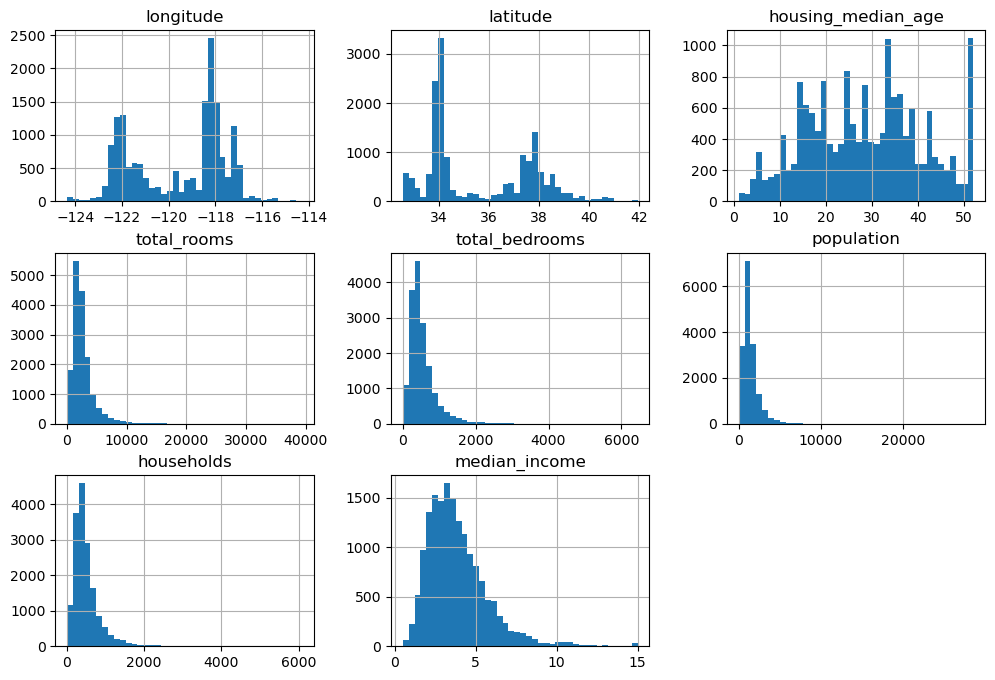

In [66]:
X_train_num_tr.hist(bins=40, figsize=(12, 8))
plt.show()

In [68]:
d = np.array([2, 100, 137845735, 1289439853])
np.log(d)

array([ 0.69314718,  4.60517019, 18.74164576, 20.97747374])

# log

    

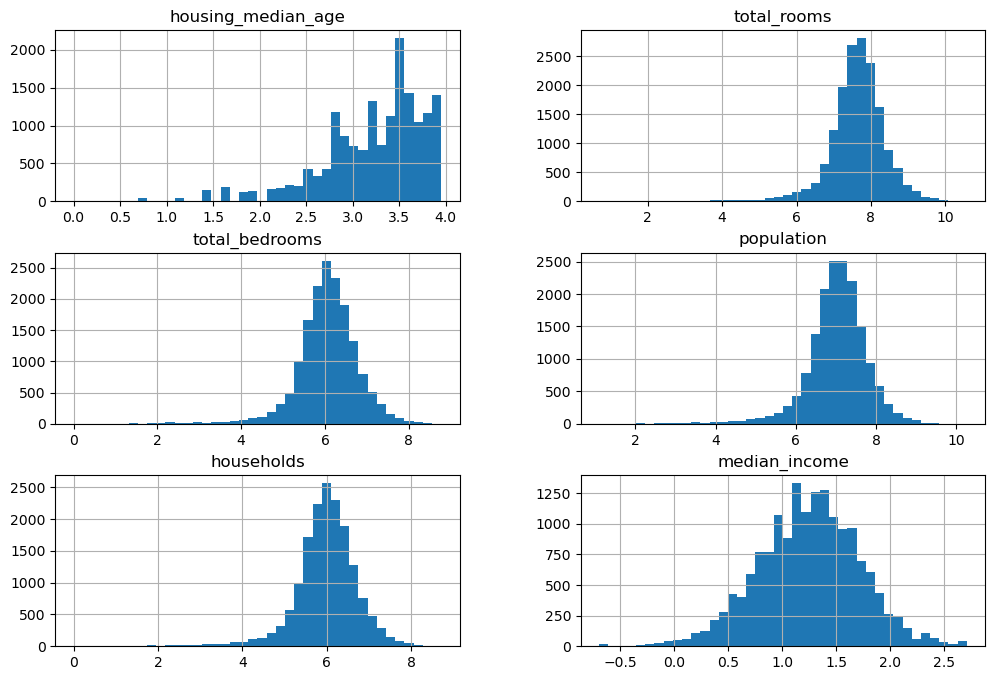

In [71]:
np.log(X_train_num_tr.drop(['latitude', 'longitude'], axis=1)).hist(bins=40, figsize=(12, 8))
plt.show()

#### Binning  Replace each value with it's percentile

<Axes: >

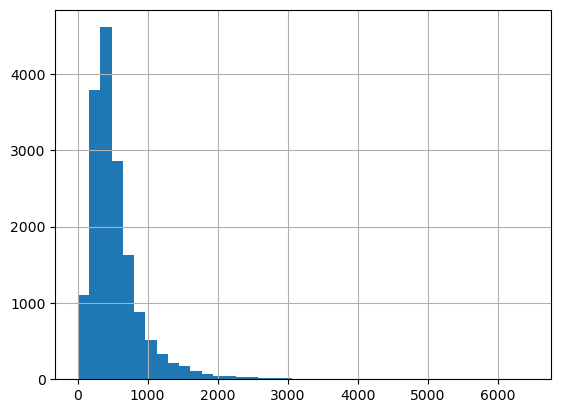

In [74]:
X_train_num_tr['total_bedrooms'].hist(bins=40)
#plt.yscale('log')

In [76]:
bins = [0, 1000, 2000, 3000, 4000, 5000, np.inf] # (0, 1000), (1000, 2000]
cat = pd.cut(X_train_num_tr['total_bedrooms'], labels=range(1, len(bins)), bins=bins)
cat

9950     1
3547     2
4448     1
6984     1
4432     1
        ..
7763     1
15377    1
17730    1
15725    1
19966    1
Name: total_bedrooms, Length: 16512, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

<Axes: xlabel='total_bedrooms'>

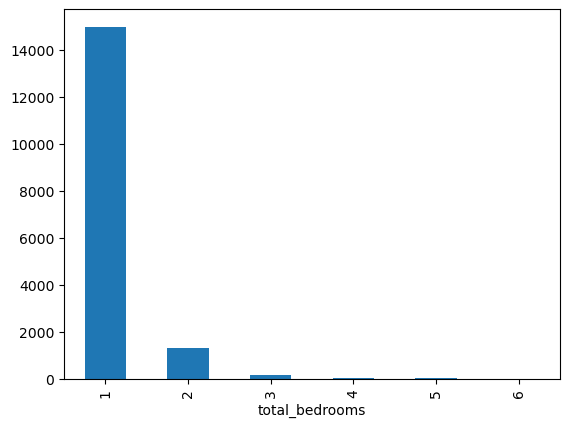

In [78]:
cat.value_counts().plot(kind='bar')

In [80]:
bins = [ np.percentile(X_train_num_tr['total_bedrooms'], _) for _ in range(1, 100)]
bins.insert(0, -np.inf)
bins.append(np.inf)
cat = pd.cut(X_train_num_tr['total_bedrooms'], labels=range(1, len(bins)), bins=bins)
cat

9950      8
3547     93
4448     41
6984     43
4432     27
         ..
7763     50
15377    85
17730    81
15725    32
19966    42
Name: total_bedrooms, Length: 16512, dtype: category
Categories (100, int64): [1 < 2 < 3 < 4 ... 97 < 98 < 99 < 100]

In [82]:
print(bins)

[-inf, 35.0, 69.0, 95.0, 118.0, 136.0, 150.65999999999997, 166.0, 180.0, 190.0, 199.0, 208.0, 216.0, 225.0, 232.0, 239.0, 246.0, 253.0, 259.0, 265.0, 270.0, 276.0, 282.0, 287.0, 293.0, 298.0, 304.0, 310.0, 314.0, 320.0, 326.0, 331.0, 337.0, 342.0, 346.0, 352.0, 358.0, 363.0, 369.0, 374.28999999999996, 381.0, 388.0, 393.0, 399.0, 405.0, 411.0, 417.0, 422.0, 428.0, 435.0, 438.0, 441.0, 447.0, 454.0, 460.0, 468.0, 474.0, 481.0, 488.0, 495.0, 501.0, 510.0, 517.0, 525.0, 534.0, 543.0, 552.0, 560.0, 571.4800000000014, 581.0, 591.0, 602.0, 612.0, 624.0, 635.0, 647.0, 660.0, 672.0, 689.0, 703.0, 718.0, 734.0, 751.0, 771.0, 792.0, 814.0, 834.0, 861.0, 892.0, 926.0, 967.8999999999996, 1011.0, 1059.1200000000008, 1117.0, 1193.3399999999983, 1282.449999999999, 1383.119999999999, 1537.67, 1747.0, 2236.679999999993, inf]


<Axes: >

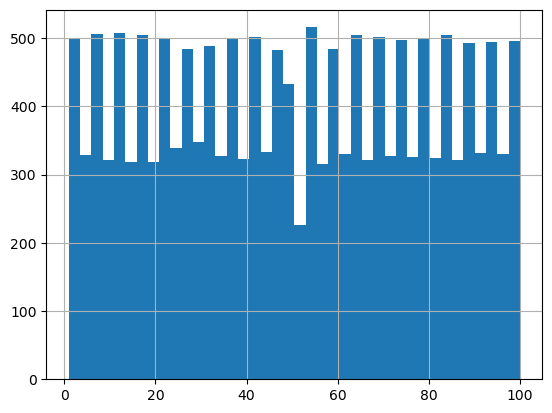

In [84]:
cat.hist(bins=40)

# Scaling

In [87]:
A = np.array([35, 40, 70, 90, 80, 50,  100, 26, 30, 45, 25, 100,])

Scaled_A = (A - A.min())/(A.max()-A.min())
Scaled_A

array([0.13333333, 0.2       , 0.6       , 0.86666667, 0.73333333,
       0.33333333, 1.        , 0.01333333, 0.06666667, 0.26666667,
       0.        , 1.        ])

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
X_train_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


In [93]:
scaler = MinMaxScaler()
scaler.fit(X_train_num_tr)
scaler.transform(X_train_num_tr)

array([[0.20119522, 0.62061637, 0.52941176, ..., 0.01754017, 0.0268048 ,
        0.2806513 ],
       [0.57270916, 0.18278427, 0.33333333, ..., 0.10527606, 0.16987338,
        0.35442959],
       [0.61155378, 0.16259299, 0.90196078, ..., 0.05072997, 0.06084526,
        0.08477814],
       ...,
       [0.25796813, 0.50903294, 0.07843137, ..., 0.08514512, 0.11445486,
        0.3538365 ],
       [0.19023904, 0.55685441, 0.84313725, ..., 0.01953576, 0.05344516,
        0.23276231],
       [0.5249004 , 0.39001063, 0.37254902, ..., 0.04334279, 0.05706298,
        0.13901188]])

In [95]:
t = X_train_num_tr['housing_median_age']

In [97]:
t.mean()

28.57091812015504

In [99]:
t.std()

12.58228071827552

<Axes: >

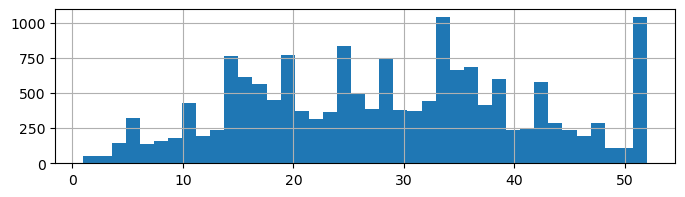

In [101]:
t.hist(bins=40, figsize=(8, 2))

In [103]:
t_s = (t-t.mean())/t.std()

<Axes: >

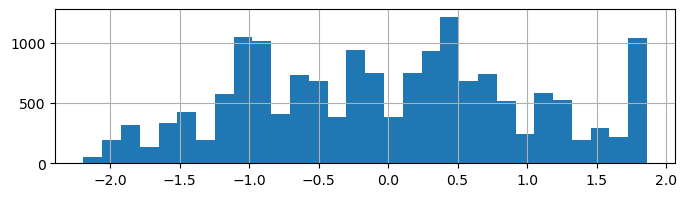

In [105]:
t_s.hist(bins=30, figsize=(8,2))

In [107]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()
scaler.fit(X_train_num_tr)

StandardScaler()

In [111]:
X_train_num_tr = scaler.transform(X_train_num_tr)
X_train_num_tr = pd.DataFrame(X_train_num_tr, 
                              columns=X_train_num.columns,
                              index=X_train_num.index)
X_train_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-1.381195,1.289422,-0.045376,-0.737644,-0.872454,-0.822910,-0.873927,0.367714
3547,0.483377,-0.640792,-0.840169,1.587216,1.246544,1.394248,1.371062,0.930745
4448,0.678333,-0.729807,1.464730,-0.590019,-0.369162,0.015823,-0.339775,-1.127069
6984,0.773311,-0.781342,0.590458,-0.261713,-0.333885,-0.394696,-0.254620,0.395713
4432,0.683331,-0.725122,1.623688,-0.601793,-0.543198,-0.025760,-0.450734,-0.754294


In [113]:
X_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


$$S(x_i) = \frac {x_i - \bar x} {\sigma_x}$$

In [116]:
scaler.mean_

array([-119.56697614,   35.62775739,   28.57091812, 2648.94319283,
        539.96814438, 1434.11573401,  502.67284399,    3.8707156 ])

In [118]:
scaler.var_

array([4.00183395e+00, 4.55599661e+00, 1.58304200e+02, 4.87661272e+06,
       1.80795891e+05, 1.27752329e+06, 1.50179314e+05, 3.61028250e+00])

In [120]:
X_test_num_tr = scaler.transform(X_test_num_tr)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns=X_test_num.columns,
                             index=X_test_num.index)
X_test_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19121,-1.536160,1.223832,0.908375,-0.305639,-0.305663,-0.349575,-0.270103,-0.041586
20019,0.258429,0.216560,-1.555482,0.293463,0.065926,0.278591,0.168573,0.079462
15104,1.293192,-1.301375,-1.317044,0.417088,0.406941,1.669402,0.421457,0.114461
3720,0.573357,-0.668902,-0.124855,0.249991,1.011361,1.741950,1.149143,-0.859448
8938,0.548362,-0.757917,0.987854,0.024932,0.040056,-0.342497,-0.063667,0.289665


# Custom Transformers 

In [123]:
from sklearn.preprocessing import FunctionTransformer
#                       transformer   inverse tranformer
log_tr = FunctionTransformer(np.log, np.exp)
pop = X_train_num["population"].values.copy()
pop_log = log_tr.transform(pop) # np.log


In [125]:
pop[:5]

array([ 504., 3010., 1452.,  988., 1405.])

In [127]:
pop_log[:5]

array([6.22257627, 8.00969536, 7.2806972 , 6.8956827 , 7.24779258])

In [129]:
np.log(pop[:5])

array([6.22257627, 8.00969536, 7.2806972 , 6.8956827 , 7.24779258])

In [131]:
n_pop = log_tr.inverse_transform(pop_log) # np.exp
n_pop[:5]

array([ 504., 3010., 1452.,  988., 1405.])

In [134]:
housing.sample(frac=0.2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12764,-121.40,38.61,33.0,3512.0,825.0,1515.0,782.0,1.9908,118800.0,INLAND
14713,-117.04,32.80,25.0,2504.0,345.0,1067.0,350.0,5.7416,243400.0,<1H OCEAN
13789,-117.62,34.44,6.0,8884.0,1687.0,3767.0,1334.0,3.5990,140200.0,INLAND
5158,-118.28,33.96,42.0,1206.0,304.0,1167.0,250.0,1.6150,101300.0,<1H OCEAN
18061,-122.01,37.25,31.0,1574.0,193.0,551.0,191.0,10.2311,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
1467,-121.99,37.96,16.0,3324.0,479.0,1470.0,461.0,7.6166,260400.0,INLAND
5303,-118.46,34.07,43.0,2511.0,456.0,808.0,407.0,6.7703,500001.0,<1H OCEAN
11147,-117.98,33.84,35.0,984.0,179.0,661.0,199.0,5.0747,189600.0,<1H OCEAN
4567,-118.26,34.06,38.0,715.0,282.0,1174.0,300.0,2.3450,225000.0,<1H OCEAN


In [138]:
def mytransformation_func(X):
    # ....
    # spaces remove from column
    # replacing NA values with 0
    # log, exp, math function R = VI / A
    return X_tr 
    

    X -> log(x) # Transform
    exp(log(x)) -> X # Reverse Transform

In [141]:
log_tr = FunctionTransformer(np.log, np.exp)

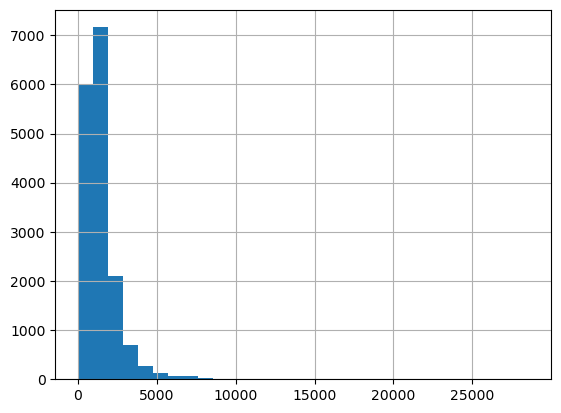

In [143]:
X_train_num["population"].hist(bins=30)
plt.show()

In [145]:
pop_log = log_tr.transform(X_train_num["population"])

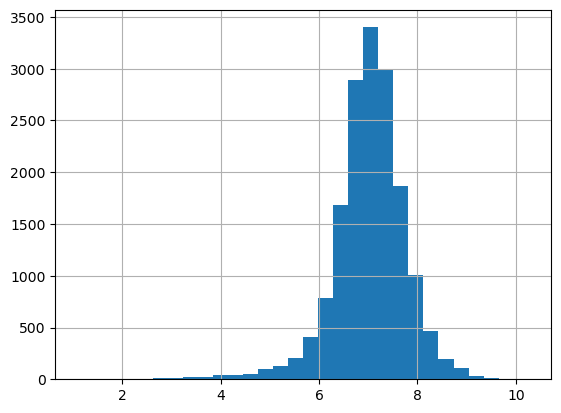

In [147]:
pop_log.hist(bins=30)
plt.show()

# Custom Transformer

    fit - learn required paramertrs from training Data

    transform - convert input values to desired output values after appling transformation

In [150]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [152]:
X_train_num_tr.values.min(axis=0).shape

(8,)

In [154]:
assert 1==0

AssertionError: 

$$S_(X_i) = \frac {x_i - min(X)} {max(X)-min(X)}$$

### Any doubt ? 

In [158]:
class MyMinMaxScaler(BaseEstimator, TransformerMixin):
    def fit(self, X_train, y_train=None):
        # learning min, max
        X_train = np.array(X_train)
        self.min_ = X_train.min(axis=0) # axis=0 column wise
        self.max_ = X_train.max(axis=0)
        self.n_features_in_ = X_train.shape[1]
        return self 
    def transform(self, X, y=None):
        X = np.array(X)
        check_is_fitted(self) # does your object self contains param_ attributes
        assert self.n_features_in_ == X.shape[1]
        X = check_array(X)
        return (X - self.min_) / (self.max_ - self.min_)

In [160]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
mimx = MyMinMaxScaler()
mimx.fit(X_train_num.dropna())
sc.fit(X_train_num.dropna())

MinMaxScaler()

In [162]:
mimx.min_

array([-124.35  ,   32.54  ,    1.    ,    2.    ,    1.    ,    3.    ,
          1.    ,    0.4999])

In [164]:
sc.data_min_

array([-124.35  ,   32.54  ,    1.    ,    2.    ,    1.    ,    3.    ,
          1.    ,    0.4999])

In [166]:
mimx.max_

array([-1.14310e+02,  4.19500e+01,  5.20000e+01,  3.93200e+04,
        6.44500e+03,  2.85660e+04,  6.08200e+03,  1.50001e+01])

In [168]:
sc.data_max_

array([-1.14310e+02,  4.19500e+01,  5.20000e+01,  3.93200e+04,
        6.44500e+03,  2.85660e+04,  6.08200e+03,  1.50001e+01])

In [170]:
tr = mimx.transform(X_train_num.dropna())
trr = sc.transform(X_train_num.dropna())

In [172]:
X_train_num.dropna().to_numpy()[:5]

array([[-1.2233e+02,  3.8380e+01,  2.8000e+01,  1.0200e+03,  1.6900e+02,
         5.0400e+02,  1.6400e+02,  4.5694e+00],
       [-1.1860e+02,  3.4260e+01,  1.8000e+01,  6.1540e+03,  1.0700e+03,
         3.0100e+03,  1.0340e+03,  5.6392e+00],
       [-1.1821e+02,  3.4070e+01,  4.7000e+01,  1.3460e+03,  3.8300e+02,
         1.4520e+03,  3.7100e+02,  1.7292e+00],
       [-1.1802e+02,  3.3960e+01,  3.6000e+01,  2.0710e+03,  3.9800e+02,
         9.8800e+02,  4.0400e+02,  4.6226e+00],
       [-1.1820e+02,  3.4080e+01,  4.9000e+01,  1.3200e+03,  3.0900e+02,
         1.4050e+03,  3.2800e+02,  2.4375e+00]])

In [174]:
tr[:5]

array([[0.20119522, 0.62061637, 0.52941176, 0.02589145, 0.02607076,
        0.01754017, 0.0268048 , 0.2806513 ],
       [0.57270916, 0.18278427, 0.33333333, 0.15646778, 0.16589075,
        0.10527606, 0.16987338, 0.35442959],
       [0.61155378, 0.16259299, 0.90196078, 0.03418282, 0.05927995,
        0.05072997, 0.06084526, 0.08477814],
       [0.63047809, 0.15090329, 0.68627451, 0.05262221, 0.0616077 ,
        0.03448517, 0.06627199, 0.28432022],
       [0.6125498 , 0.16365569, 0.94117647, 0.03352154, 0.0477964 ,
        0.04908448, 0.05377405, 0.13362574]])

In [176]:
trr[:5]

array([[0.20119522, 0.62061637, 0.52941176, 0.02589145, 0.02607076,
        0.01754017, 0.0268048 , 0.2806513 ],
       [0.57270916, 0.18278427, 0.33333333, 0.15646778, 0.16589075,
        0.10527606, 0.16987338, 0.35442959],
       [0.61155378, 0.16259299, 0.90196078, 0.03418282, 0.05927995,
        0.05072997, 0.06084526, 0.08477814],
       [0.63047809, 0.15090329, 0.68627451, 0.05262221, 0.0616077 ,
        0.03448517, 0.06627199, 0.28432022],
       [0.6125498 , 0.16365569, 0.94117647, 0.03352154, 0.0477964 ,
        0.04908448, 0.05377405, 0.13362574]])

### Feature Engineering 


    Feature Selection   - We select important feature further and drop irrelvant features

    Feature Extraction - We create new features based on existing features or we collect new feature regarding same instances

In [179]:
new_housing = housing.copy()
new_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [181]:
new_housing["rooms_per_households"] = new_housing["total_rooms"] / new_housing["households"]

In [183]:
new_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [185]:
new_housing['rooms_per_households'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: rooms_per_households, dtype: float64

In [187]:
new_housing.groupby('rooms_per_households')['median_house_value'].mean()

rooms_per_households
0.846154      162500.0
0.888889      112500.0
1.000000      137500.0
1.130435      156250.0
1.260870      112500.0
                ...   
59.875000      67500.0
61.812500     437500.0
62.422222      87500.0
132.533333    162500.0
141.909091    500001.0
Name: median_house_value, Length: 19392, dtype: float64

In [189]:
new_housing['rooms_per_household_cat'] = pd.cut(new_housing['rooms_per_households'],
       bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf],
       labels=["10", "20", "30", "40", "50", "60", "70", '>80'])

In [191]:
new_housing.groupby('rooms_per_household_cat')['median_house_value'].mean().sort_values(ascending=False)

/var/folders/92/77wzzgtd3b31048n9sf_9_qm0000gn/T/ipykernel_79361/2648259807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_housing.groupby('rooms_per_household_cat')['median_house_value'].mean().sort_values(ascending=False)


rooms_per_household_cat
>80    331250.500000
70     262500.000000
10     207080.349221
20     193017.267516
30     169906.666667
60     158040.000000
40     152776.923077
50     126250.000000
Name: median_house_value, dtype: float64

(0.0, 70.0)

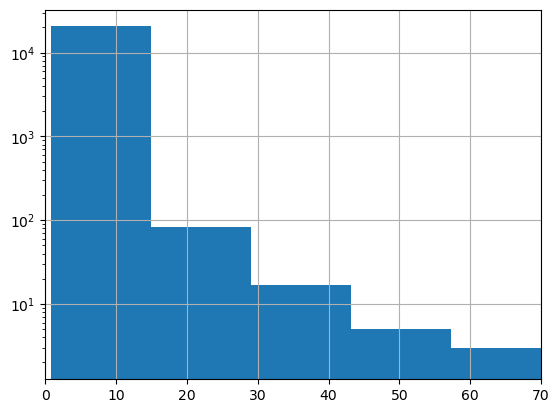

In [193]:
new_housing.rooms_per_households.hist()
plt.yscale('log')
plt.xlim([0, 70])

In [195]:
new_housing.corrwith(new_housing['median_house_value'], numeric_only=True).sort_values(ascending=False, 
                                                                                       key = lambda x: abs(x))

median_house_value      1.000000
median_income           0.688075
rooms_per_households    0.151948
latitude               -0.144160
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
longitude              -0.045967
population             -0.024650
dtype: float64

In [198]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Pipelines


    it combines all transformations steps together in single block so it becomes easy to maintain and update the code

In [203]:
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.impute import SimpleImputer # missing values
from sklearn.preprocessing import FunctionTransformer # for log
from sklearn.pipeline import Pipeline, make_pipeline # 

In [219]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    #FunctionTransformer(np.log),
    StandardScaler()
    )

In [221]:
X_train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-122.33,38.38,28.0,1020.0,169.0,504.0,164.0,4.5694
3547,-118.60,34.26,18.0,6154.0,1070.0,3010.0,1034.0,5.6392
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226
4432,-118.20,34.08,49.0,1320.0,309.0,1405.0,328.0,2.4375


In [231]:
X_train_num_tr = num_pipeline.fit_transform(X_train_num)
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns, index=X_train_num.index)
X_train_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9950,-1.381195,1.289422,-0.045376,-0.737644,-0.872454,-0.822910,-0.873927,0.367714
3547,0.483377,-0.640792,-0.840169,1.587216,1.246544,1.394248,1.371062,0.930745
4448,0.678333,-0.729807,1.464730,-0.590019,-0.369162,0.015823,-0.339775,-1.127069
6984,0.773311,-0.781342,0.590458,-0.261713,-0.333885,-0.394696,-0.254620,0.395713
4432,0.683331,-0.725122,1.623688,-0.601793,-0.543198,-0.025760,-0.450734,-0.754294


In [225]:
X_train_num_tr

array([[-1.38119534,  1.28942183, -0.04537615, ..., -0.82291045,
        -0.87392732,  0.36771424],
       [ 0.48337727, -0.64079243, -0.84016868, ...,  1.3942476 ,
         1.37106156,  0.93074485],
       [ 0.67833258, -0.72980717,  1.46472968, ...,  0.01582292,
        -0.33977479, -1.12706938],
       ...,
       [-1.09626065,  0.79749829, -1.87339898, ...,  0.88552219,
         0.50145092,  0.92621871],
       [-1.43618273,  1.00832267,  1.22629191, ..., -0.77248028,
        -0.45589491,  0.00225486],
       [ 0.24343227,  0.27277985, -0.68121018, ..., -0.17085718,
        -0.39912507, -0.71319083]])

In [233]:
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.impute import SimpleImputer # missing values
from sklearn.preprocessing import FunctionTransformer # for log
from sklearn.pipeline import Pipeline, make_pipeline # 

In [235]:
num_pipeline = Pipeline([
    ("missing value imputer", SimpleImputer(strategy="median") ),
    ("scaling", StandardScaler())
    
])

In [237]:
num_pipeline.fit(X_train_num)

Pipeline(steps=[('missing value imputer', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])

In [239]:
num_pipeline.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [241]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [247]:
num_pipeline.named_steps

{'missing value imputer': SimpleImputer(strategy='median'),
 'scaling': StandardScaler()}

In [251]:
(num_pipeline.named_steps["missing value imputer"])

SimpleImputer(strategy='median')

In [253]:
(num_pipeline.named_steps["missing value imputer"]).statistics_

array([-118.49  ,   34.25  ,   29.    , 2138.5   ,  438.    , 1170.    ,
        412.    ,    3.5294])

# Column Transformer Pipeline 

In [292]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [260]:
print(num_features)
print(cat_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


In [262]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


preprocessing_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_features),
    ("categorical", cat_pipeline, cat_features)
    # (step_name, Transformer/Pipeline, feature name)
])

In [264]:
X_train_tr = preprocessing_pipeline.fit_transform(X_train)

In [280]:
cols = [ value.split("__")[1] for value in preprocessing_pipeline.get_feature_names_out()]
X_train_tr = pd.DataFrame(X_train_tr, columns=cols, index=X_train.index)

In [282]:
X_train_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9950,-1.381195,1.289422,-0.045376,-0.737644,-0.872454,-0.822910,-0.873927,0.367714,0.0,1.0,0.0,0.0,0.0
3547,0.483377,-0.640792,-0.840169,1.587216,1.246544,1.394248,1.371062,0.930745,1.0,0.0,0.0,0.0,0.0
4448,0.678333,-0.729807,1.464730,-0.590019,-0.369162,0.015823,-0.339775,-1.127069,1.0,0.0,0.0,0.0,0.0
6984,0.773311,-0.781342,0.590458,-0.261713,-0.333885,-0.394696,-0.254620,0.395713,1.0,0.0,0.0,0.0,0.0
4432,0.683331,-0.725122,1.623688,-0.601793,-0.543198,-0.025760,-0.450734,-0.754294,1.0,0.0,0.0,0.0,0.0


In [288]:
X_train_tr.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [381]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [326]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

new_feature_pipeline = FunctionTransformer(get_rooms_per_household)

pipeline = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=pd.CategoricalDtype))
)

In [328]:
X_train_tr = pipeline.fit_transform(X_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1118: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  df_row = df_row.select_dtypes(


In [344]:
fnames = pipeline.get_feature_names_out()
cols = [name.split("__")[1] for name in fnames]
cols = [ (name.split("_")[2] if "ocean" in name else name) for name in cols]
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [346]:
X_train_tr = pd.DataFrame(X_train_tr, columns=cols, index=X_train.index)

In [348]:
X_train_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9950,-1.381195,1.289422,-0.045376,-0.737644,-0.872454,-0.822910,-0.873927,0.367714,0.0,1.0,0.0,0.0,0.0
3547,0.483377,-0.640792,-0.840169,1.587216,1.246544,1.394248,1.371062,0.930745,1.0,0.0,0.0,0.0,0.0
4448,0.678333,-0.729807,1.464730,-0.590019,-0.369162,0.015823,-0.339775,-1.127069,1.0,0.0,0.0,0.0,0.0
6984,0.773311,-0.781342,0.590458,-0.261713,-0.333885,-0.394696,-0.254620,0.395713,1.0,0.0,0.0,0.0,0.0
4432,0.683331,-0.725122,1.623688,-0.601793,-0.543198,-0.025760,-0.450734,-0.754294,1.0,0.0,0.0,0.0,0.0


# Model Selection and Training

In [351]:
from sklearn.linear_model import LinearRegression

In [357]:
model = LinearRegression()

model.fit(X_train_tr, y_train) # learning

LinearRegression()

In [361]:
y_pred = model.predict( pipeline.transform(X_test)  )

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [363]:
y_pred

array([246112., 131328., 155744., ...,  75904., 172704., 305568.])

In [367]:
y_test.to_numpy()

array([151600.,  99200., 134500., ...,  65900., 217100., 359000.])

### Error metric

$$\text {Mean Squared Error MSE} = \frac {\sum {(\hat y_i - y_i)}^2} {N} $$

In [375]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  4727647533.133479
RMSE:  68757.8906972391


In [377]:
y_test.mean()

206404.1664244186

In [379]:
(68757/206404)*100

33.31185442142594

In [369]:
(y_test - y_pred)

19121    -94512.0
20019    -32128.0
15104    -21244.0
3720      89652.0
8938     181524.0
           ...   
313      -92008.0
4596      40852.0
16287    -10004.0
5771      44396.0
18254     53432.0
Name: median_house_value, Length: 4128, dtype: float64

Data already exists so skipping download and extraction!


In [415]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

---

In [16]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression




# download and extract housing data in datasets folder
def get_housing_data():
    dir_path = Path('datasets/')
    file_path = Path('datasets/housing.tgz')
    url = "https://github.com/sachinyadav3496/handson-ml2/raw/master/datasets/housing/housing.tgz"
    if not dir_path.exists():
        # if folder doesn't exists create one
        os.mkdir(dir_path)
    if not file_path.exists():
        request.urlretrieve(url, file_path)
        with tarfile.open(file_path) as file:
            file.extractall(dir_path)
        print("Dowload and Extraction is complete!")
    else:
        print("Data already exists so skipping download and extraction!")
    
    df = pd.read_csv(Path("datasets/housing.csv"))
    #df['ocean_proximity'] = df['ocean_proximity'].astype('category')
    return df
    
housing = get_housing_data()
X_train, X_test, y_train, y_test = train_test_split(housing.drop('median_house_value', axis=1), housing["median_house_value"],
                                                   test_size=0.2, random_state=42)

Data already exists so skipping download and extraction!


In [18]:
def get_rooms_per_household(X, y=None):
    return (X[:, 0]/X[:, 1]).reshape(-1, 1)

In [61]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


new_feature_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),    
    FunctionTransformer(get_rooms_per_household),
    StandardScaler() )
        

pipeline = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
    (new_feature_pipeline, ['total_rooms', 'households'])
)

In [63]:
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

In [65]:
model = LinearRegression()
model.fit(X_train_tr, y_train)

LinearRegression()

In [67]:
y_hat = model.predict(X_test_tr)

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print("RMSE: ", rmse.round(2))
print((rmse/y_test.mean()*100).round(2), "% error approx")

RMSE:  69827.85
33.98 % error approx
